In [11]:
# Installing icimlreporsitory package
!pip install ucimlrepo

In [3]:
# Importing the dataset from UCI ml Repository

from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

# metadata
print(online_retail.metadata)

# variable information
print(online_retail.variables)


{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

In [6]:
hr_df = X.copy()

In [5]:
# Checking on all data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [9]:
# Reviewing the top rows of the data
hr_df.head()

print(f'The Data posssess {hr_df.shape[0]} rows of data')

The Data posssess 541909 rows of data


In [10]:
# Checking the data for missing value
print(hr_df.isnull().sum())


Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [12]:
# Lets deal with the missing data by eliminating all the records with missing customer ID
hr_df = hr_df.dropna(subset=['CustomerID'])
print(hr_df.shape)

(406829, 6)


In [13]:
# Confirming the missing data in the dataset
hr_df.isnull().sum()

,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [16]:
# Creating an invoice month
import datetime as dt
import pandas as pd

# Ensuring that the Invoice Date is in datetime
hr_df['InvoiceDate'] = pd.to_datetime(hr_df['InvoiceDate'])
# Defining a function to carry out the month conversin
def extract_month(x):
  return dt.datetime(x.year, x.month, 1)

hr_df['InvoiceMonth'] = hr_df['InvoiceDate'].apply(extract_month)

In [27]:
# Create a column with the minimum Invoice Date, this represent the first time the customer purchased product(The cohort Month)
hr_df['CohortMonth'] = hr_df.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [31]:
# Previewing the data
hr_df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


To finalise the core of this analysis we would find the number of month s from the for each customer by deducting the Cohort Month from the Invoice month and then summarise this by using a pivot

In [32]:
# Creating a date element function to get a series for substraction

def get_date_int(df, column):
  year = df[column].dt.year
  month = df[column].dt.month
  day = df[column].dt.day
  return year, month, day

# Applying this to ge
_, invoice_month,invoice_year = get_date_int(hr_df, 'InvoiceMonth')
_, cohort_month, cohort_year = get_date_int(hr_df, 'CohortMonth')

In [37]:
year_diff = invoice_year - cohort_year
month_diff = abs(invoice_month - cohort_month)
hr_df['CohortNoofMonths'] = (year_diff * 12) + month_diff+1
# Previewing the data
hr_df.tail()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortNoofMonths
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541908,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5


In [56]:
hr_df['days'] = hr_df['InvoiceMonth'] - hr_df['CohortMonth']

hr_df['Month_Duration'] = round((hr_df['days'].dt.days)/30,0)
hr_df['Month_Duration'].astype(int)

hr_df.tail()



,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortNoofMonths,days,Month,Month_Duration
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5,122 days,4.0,4.0
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5,122 days,4.0,4.0
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5,122 days,4.0,4.0
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5,122 days,4.0,4.0
541908,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5,122 days,4.0,4.0


In [69]:
from os import name
# Now we can count the customer ID, after groupping the Cohort Month and cohortNoofMonth created
cohort_data = hr_df.groupby(['CohortMonth', 'Month_Duration'])['CustomerID'].nunique().reset_index(name='No of Customers')

cohort_table = cohort_data.pivot(index='CohortMonth', columns='Month_Duration', values='No of Customers')
cohort_table


cohort_table.index=cohort_table.index.strftime('%Y-%m')
cohort_table.head()

Month_Duration,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
CohortMonth,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN


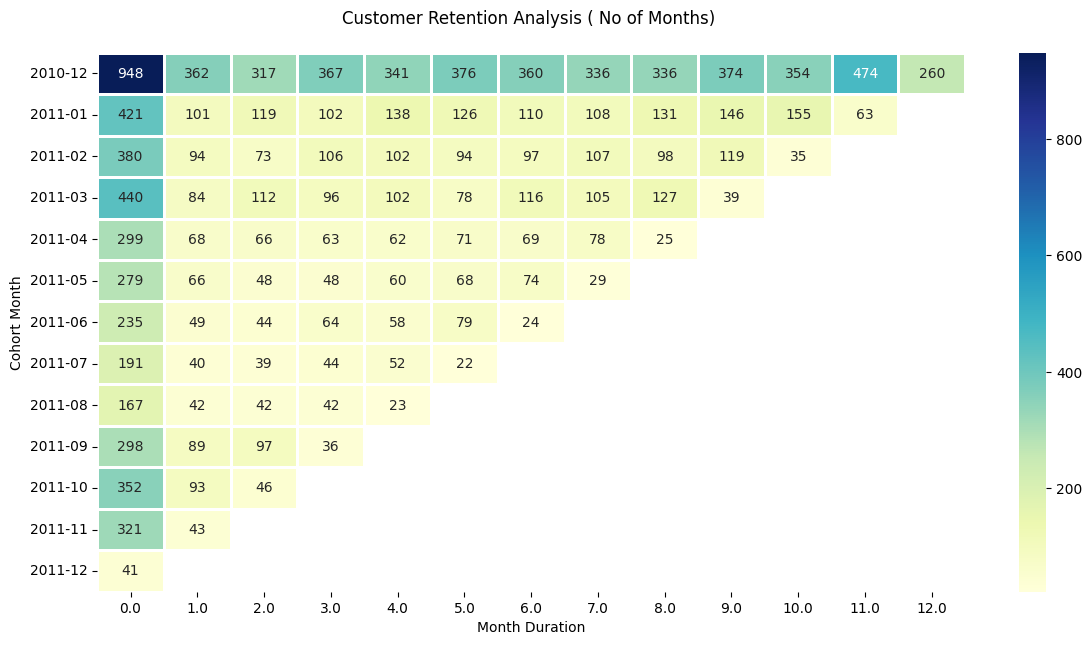

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
sns.heatmap(cohort_table, annot=True, cmap='YlGnBu',linewidths=1,linecolor='white',fmt='.4g')
plt.xlabel('Month Duration')
plt.ylabel('Cohort Month')
plt.yticks(rotation=0)
plt.title('Customer Retention Analysis ( No of Months) \n')
plt.show()

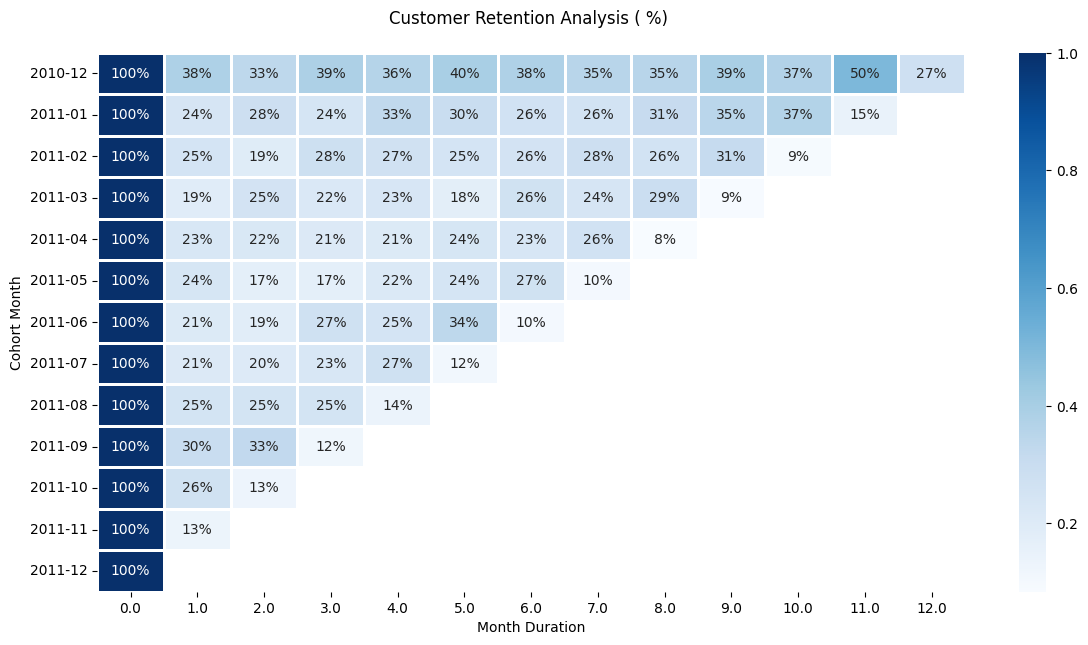

In [92]:
# Viewing this in %
new_cohort_table_percent  =  cohort_table.divide(cohort_table.iloc[:,0],axis= 0)
plt.figure(figsize=(14,7))
sns.heatmap(new_cohort_table_percent, annot=True, cmap='Blues',linewidths=1,linecolor='white',fmt='.00%')
plt.xlabel('Month Duration')
plt.ylabel('Cohort Month')
plt.yticks(rotation=0)
plt.title('Customer Retention Analysis ( %) \n')
plt.show()